<a href="https://colab.research.google.com/github/JuanFelipeSanchez/Data-Scientist/blob/main/DS_C3_SC1_juanfelipesanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
#Carga inicial de conexiones, funciones y librerías.
from google.colab import drive
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Se guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv y en otro llamado (metada) los registros del archivo Metadata.csv. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [260]:
#Se crean los Dataframes iniciales.
happiness = pd.read_csv('/content/gdrive/MyDrive/Data Scientist/7. Visualización de datos con Python/Happiness_report.csv')
metada = pd.read_csv('/content/gdrive/MyDrive/Data Scientist/7. Visualización de datos con Python/Metadata.csv')

#Se crea el Dataframe Mexico que refleja únicamente los datos de este país. Se modifica el índice.
Mexico = happiness[happiness['Country or region']=='Mexico']
Mexico.set_index('Country or region',inplace=True)

Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.595, 0, 'MEX')

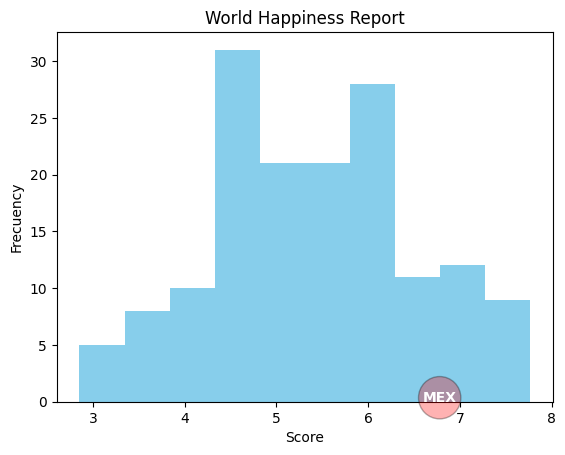

In [261]:
#Se crea el histograma usando Pandas.
happiness['Score'].plot.hist(title="World Happiness Report",xlabel='Score',ylabel='Frecuency',color='skyblue')

#Se agrega la etiqueta de texto del valor del Score de México usando el Dataframe creado previamente.
Value = Mexico.loc['Mexico','Score']

#Se agregan propiedades gráficas a la etiqueta.
props_bbox = {'boxstyle': 'circle','facecolor': 'red', 'edgecolor': 'black','alpha':0.3}
props_font = {'weight': 'bold','color':'white'}

plt.text(Value,0,"MEX",fontdict=props_font,bbox=props_bbox)

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(1.2, 0.861, 'MEX')

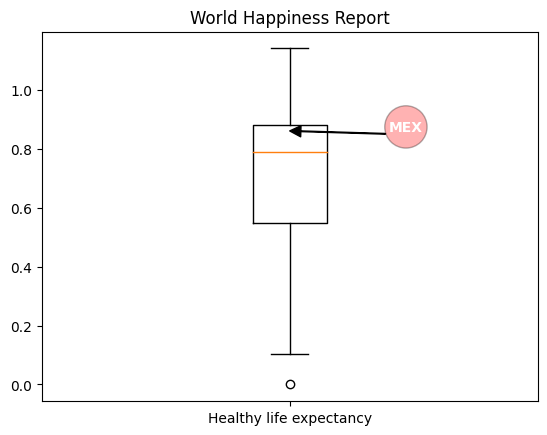

In [262]:
#Se construye el boxplot usando Matplotlib.
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'])
plt.title("World Happiness Report")

#Se agrega la etiqueta de texto del valor de la esperanza de vida de México usando el Dataframe creado previamente.
Value = Mexico.loc['Mexico','Healthy life expectancy']

#Se agregan propiedades gráficas a la etiqueta.
props_bbox = {'boxstyle': 'circle','facecolor': 'red', 'edgecolor': 'black','alpha':0.3}
props_arrow = {'facecolor':'black', 'width':0.5,'headwidth':8,'headlength':8}

plt.annotate("MEX",xy=(1,Value),xytext=(1.2,Value),arrowprops=props_arrow,bbox=props_bbox,weight='bold',color='white')

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

([], [])

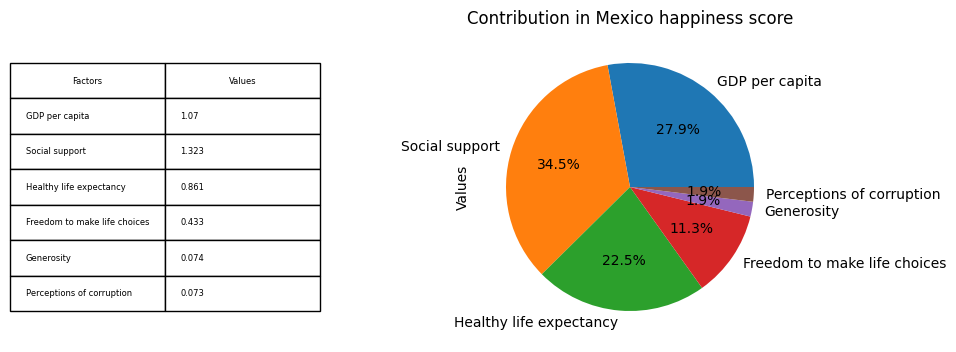

In [263]:
#Se modifica la estructura del Dataframe México.
Mexico2 = Mexico
Mexico2 = Mexico2.drop(columns=['Score', 'Overall rank'])
Mexico2 = pd.DataFrame(Mexico2.T)
Mexico2 = Mexico2.reset_index()
Mexico2.columns = ['Factors','Values']

#Se crea el gráfico circular usando pandas.
Mexico2.plot.pie(y='Values',labels=Mexico2['Factors'],autopct='%1.1f%%',legend=False,figsize=(4,15))
plt.title("Contribution in Mexico happiness score")

#Se agrega la tabla con los datos del gráfico.
plt.table(cellText=Mexico2.values,colLabels=Mexico2.columns,cellLoc='left',loc='left',bbox=[-1.5, 0.1, 1, 0.8])
plt.xticks([])

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

Text(0.5, 1.0, 'World Happiness Report')

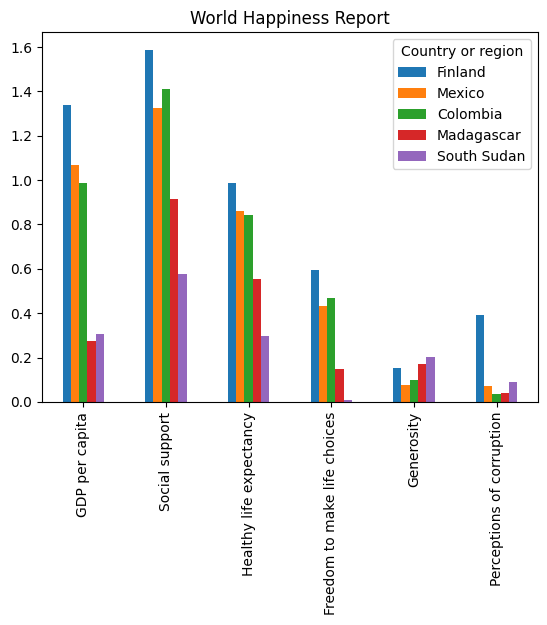

In [264]:
#Se selecciona el país más feliz.
idx_max = happiness['Score'].idxmax()
País_Más_Feliz = happiness.loc[idx_max,'Country or region']

#Se selecciona el país menos feliz.
idx_min = happiness['Score'].idxmin()
País_Menos_Feliz = happiness.loc[idx_min,'Country or region']

#Dataframe definitivo. Se incluyen los países de Colombia y Madagascar.
países = happiness[(happiness['Country or region']=='Mexico')|(happiness['Country or region']=='Colombia')|(happiness['Country or region']=='Madagascar')|(happiness['Country or region']==País_Más_Feliz)|(happiness['Country or region']==País_Menos_Feliz)]
países = países.drop(columns=['Score', 'Overall rank'])
países.set_index('Country or region',inplace=True)
países = pd.DataFrame(países.T)

#Creación del gráfico de barras usando Pandas.
países.plot(kind='bar')
plt.title("World Happiness Report")

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

Text(0.5, 0.98, 'Contribution in happiness score')

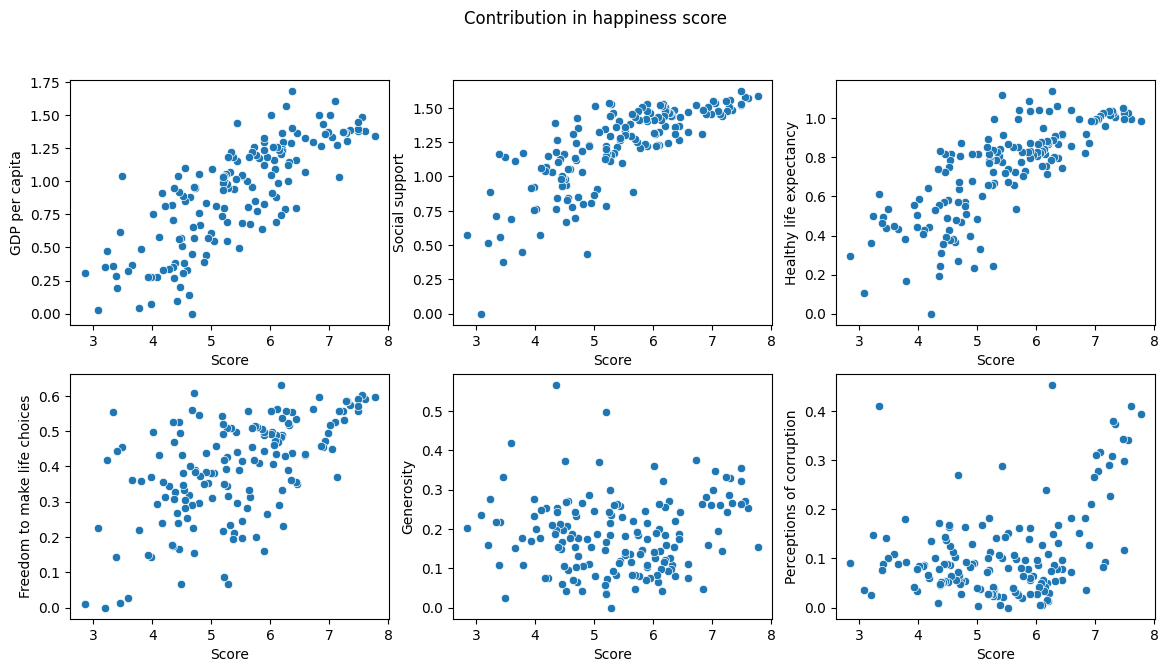

In [265]:
#Creación de matriz de subgráficas.
fig,axs = plt.subplots(2,3,figsize=(14,7))
sns.scatterplot(x=happiness['Score'],y=happiness['GDP per capita'],ax=axs[0,0])
sns.scatterplot(x=happiness['Score'],y=happiness['Social support'],ax=axs[0,1])
sns.scatterplot(x=happiness['Score'],y=happiness['Healthy life expectancy'],ax=axs[0,2])
sns.scatterplot(x=happiness['Score'],y=happiness['Freedom to make life choices'],ax=axs[1,0])
sns.scatterplot(x=happiness['Score'],y=happiness['Generosity'],ax=axs[1,1])
sns.scatterplot(x=happiness['Score'],y=happiness['Perceptions of corruption'],ax=axs[1,2])
fig.suptitle("Contribution in happiness score")


Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<Axes: >

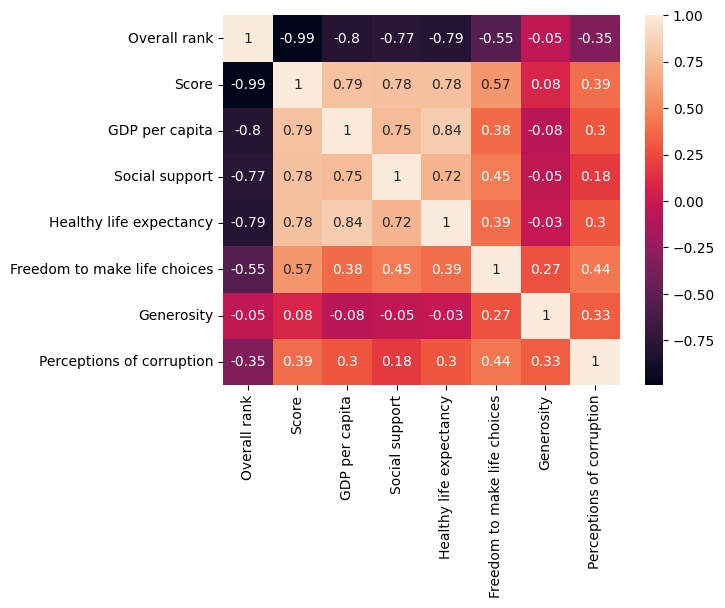

In [213]:
#Se crea el mapa de calor.
correlaciones = happiness.drop(columns='Country or region')
sns.heatmap(round(correlaciones.corr(),2),annot=True)

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

<ipython-input-258-01b35c91d6fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',x='Region',y='Score',data=Score_region,height=3,aspect=3.5,palette="muted")


Text(0.5, 1.0, 'World Happiness Report')

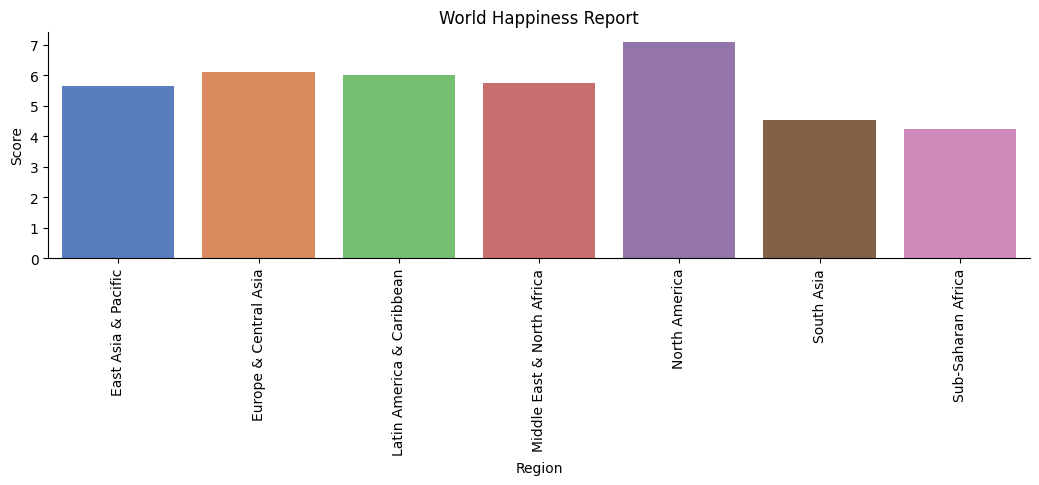

In [258]:
#Se unifican los dataframes.
full_data = pd.merge(happiness,metada,left_on='Country or region',right_on='TableName',how="left")
Score_region = full_data[['Region','Score']].groupby('Region').mean()
Score_region = pd.DataFrame(Score_region)
Score_region.reset_index(inplace=True)

#Se crea el gráfico de barras.
sns.catplot(kind='bar',x='Region',y='Score',data=Score_region,height=3,aspect=3.5,palette="muted")
plt.xticks(rotation=90)
plt.title("World Happiness Report")